# Assignment Transient Groundwater course 2020-2021

@ prof. dr.ir. T.N. Olsthoorn Jan 20, 2021

A groundwater extraction station with three wells is to be realized in a very long, 5 km wide, almost straight valley. The valley is bounded by bedrock while the sediments below the water table can be considered a 40 m thick, layer of sand on top of pratically impervious material. A river, that may be considered fully penetrating and in direct contact with the aquifer, flows along one of the valley walls. The water table is 5 m below ground surface at the center line of the valley, where the wells are to be installed. The three wells will be placed 500 m apart along the center line of the valley and they will pump 2400 m3/d each.

One pumping well and three observation wells were installed first, and a pumping test was done on it to determine the aquifer properties, i.e. its transmissivity `kD` and its storage coefficient `Sy`. The pumping lasted for 1 montsh (30 days) at a rate of 600 m3/d. During this time, the heads in the well and in the piezometers were monitored from which the drawdown relative to the initial situation was determined. These darwdowns are  provided.

_**Assignment questions:**_

    1) With the drawdown data given, ata determine the aquifer properties `kD` and `S`.
    
    2) What will be the development of the drawdown in the wells assuming they are fully penetrating and are not clogged?
    
    3) Show this development along a line perpendicular to the valley axis and along the line through the three wells and parallel to the valley axis.
    
    4) Show the drawdown after it has become steady srate.
    
    5) What is the required depth of the pumps, given that the wells have an extra drawdown due to partial penetration and clogging which doubles the drawdown relative to the case of unclogged fully penetrating well and given that the top of the pump has te be at least 1.5 m below the water table in the well.

For myself:

To set up the assigment

Specify the properties and implement the pumping test and the pumping staton

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
from scipy.special import exp1 as W # Theis well function
import pandas as pd
import os
import pdb

def newfig(title='title', xlabel='xlabel', ylabel='ylabel', xlim=None, ylim=None, 
           xscale=None, yscale=None, fontsize=15, size_inches=(10, 8)):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    ax.set_title(title,   fontsize=fontsize)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    if xscale: ax.set_xscale(xscale)
    if yscale: ax.set_ysvale(yscale)
    if xlim: ax.set_xlim(xlim)
    if ylim: ax.set_ylim(ylim)
    ax.grid()
    return ax

def noise(time=None, dt=0.01, sigma=0.002, T=3):
    n = int(time[-1] / dt + 1)
    t = dt * np.arange(n)
    r = sigma * (np.random.rand(n) - 0.5)
    b = np.exp(- time / T)
    ruis = lfilter(b, 1, r) 
    return np.interp(time, t, ruis)

In [4]:
participants = os.path.abspath('../../../2021/Participants_HWR_2020-2022_2020-12-08.xlsx')

In [5]:
student_data

NameError: name 'student_data' is not defined

In [31]:
list(students['Person no.'].values)

['1079102',
 '1081168',
 '1077398',
 '1082043',
 '1080655',
 '1050865',
 '1068711',
 '1080513',
 '1079554',
 '1077716',
 '1074591',
 '1060427',
 '1051337',
 '1082894']

In [6]:
students_data = pd.read_excel(participants, index_col='No.', dtype=str)
students_data.index = [int(p) for p in students_data.index]
students = ['_'.join(list(students_data.loc[i, ["Last name", "First name", "Person no."]])) for i in students_data.index]
students

['Jagne_Sainabou_1079102',
 'Mohammed_Gutoof Osman Ali_1081168',
 'Bakare_Kamaldeen Teniola_1077398',
 'Frem_Michel_1082043',
 'Ali_Ahmed Hassan Aboalbasher_1080655',
 'Vincent_Kevin_1050865',
 'Mwende_Bob Sammy Munyoki_1068711',
 'Monir_Jamilurahman_1080513',
 'Turay_Ibrahim_1079554',
 'Eiman_Fatima_1077716',
 'Das_Sourav Kumar_1074591',
 'Dukuray_Mohamed Abdulai_1060427',
 'Mahmoud_Hesham Hussien Elsayed_1051337',
 'Alqrinawi_Fuad Younis Mahmoud_1082894']

## Pumping test

## Generate data with noise for each student

In [1]:
for student in students:
    S = np.random.choice([0.16, 0.18, 0.20, 0.22, 0.24])
    k = np.random.choice([25, 27, 30, 31, 33, 35])
    D = 50

    r_pz = [0.25, np.random.choice([8, 10, 11, 13]),
                  np.random.choice([16, 18, 19, 20, 22, 25, 27]),
                  np.random.choice([35, 38, 40, 43, 45, 48])]
    

    Q = np.random.choice([500, 600, 650, 700]) # m3/d
    time = np.logspace(np.log10(0.001), np.log10(30), 100)

    # For exam
    exam = True
    if exam:
        S = [0.15]
        k = [30.]
        r_pz = [50]
        Q = [650]
    
    
    ppdd = np.zeros((len(time), len(r_pz)))
    for ir, r in enumerate(r_pz):
        u = r **2 * S / (4 * k * D * time)
        ppdd[:, ir] = Q / (4 * np.pi * k * D) * W(u) + noise(time=time)

    columns = ['r={:.0f} m'.format(r) for r in r_pz]
    data = pd.DataFrame(ppdd, columns=columns, index=time)
    data.index.name='days'
    "Save the data to excel under the name of the student."
    data.to_excel(student + '.xlsx')

data

NameError: name 'students' is not defined

# For exam



In [14]:
for student in ["exam_2021_02_23"]:
    S = np.random.choice([0.16, 0.18, 0.20, 0.22, 0.24])
    k = np.random.choice([25, 27, 30, 31, 33, 35])
    D = 50

    r_pz = [0.25, np.random.choice([8, 10, 11, 13]),
                  np.random.choice([16, 18, 19, 20, 22, 25, 27]),
                  np.random.choice([35, 38, 40, 43, 45, 48])]
    

    Q = np.random.choice([500, 600, 650, 700]) # m3/d
    time = np.logspace(np.log10(0.001), np.log10(30), 100)

    exam = True
    if exam:
        S = 0.15
        k = 30.
        r_pz = [50]
        Q = 650
    
    
    ppdd = np.zeros((len(time), len(r_pz)))
    for ir, r in enumerate(r_pz):
        u = r **2 * S / (4 * k * D * time)
        ppdd[:, ir] = Q / (4 * np.pi * k * D) * W(u) + noise(time=time)

    columns = ['r={:.0f} m'.format(r) for r in r_pz]
    data = pd.DataFrame(ppdd, columns=columns, index=time)
    data.index.name='days'
    "Save the data to excel under the name of the student."
    data.to_excel(student + '.xlsx')

data

,r=50 m
days,
0.001000,-0.000032
0.001110,-0.000043
0.001232,-0.000054
0.001367,-0.000067
0.001517,-0.000082
...,...
19.780054,0.185337
21.950828,0.184263
24.359836,0.184033


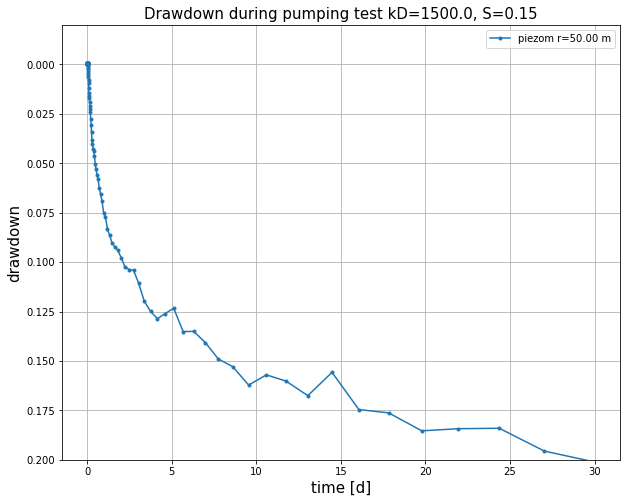

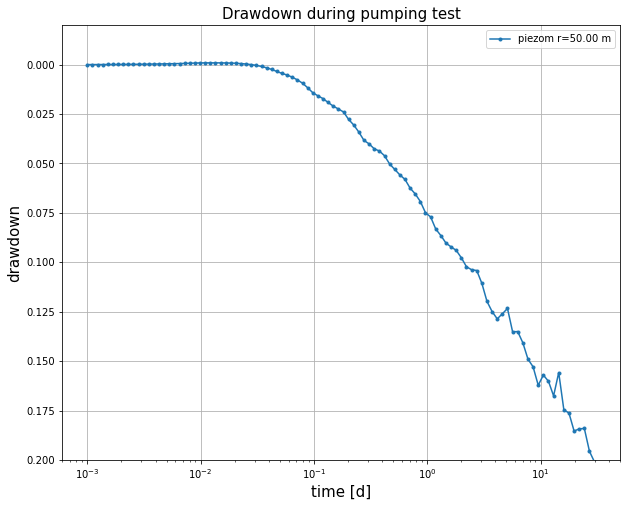

In [16]:

ylim = (0.2, -0.02)
ax = newfig("Drawdown during pumping test kD={:.1f}, S={:.2f}".format(k * D, S),
            "time [d]", "drawdown", ylim=ylim)
for ir, r in enumerate(r_pz):
    ax.plot(time, ppdd[:, ir], '.-', label='piezom r={:5.2f} m'.format(r))
ax.legend()
           
ax = newfig("Drawdown during pumping test", "time [d]", "drawdown", xscale='log', ylim=ylim)
for ir, r in enumerate(r_pz):
    ax.plot(time, ppdd[:, ir], '.-', label='piezom r={:5.2f} m'.format(r))
ax.legend()
        
def pplog(y0=None, a=None, time=time):
    """Return a linear line on half-log scale."""
    print("dd per log cycle = {:.3g}".format(a))
    print("Intersection time with zero drawdown = {:.3g} d".format(10 **(-y0/a)))
    return y0 + a * np.log10(time)

y0, a= 0.165, 0.074
t0 = 10 ** (-y0 / a)

#ax.plot(time, pplog(y0=y0, a=a), '--', color='orange', label='linear approximation')
ax.legend()

In [162]:
pwd

'/Users/Theo/Instituten-Groepen-Overleggen/IHE/git/TransientGroundwaterFlow/excercises_notebooks'

In [161]:
data.to_excel("test_data.xlsx")

In [44]:
kD_ = Q / (4 * np.pi * a) * np.log(10)
S_ =  2.25 * kD_ * t0 / r_pz[1] ** 2
r_inf = np.sqrt(2.25 * kD_ / S_ * time[-1])
print("kD = {:.3g} m2/d, S = {:.3g}, r_inf(t={:.1f}) = {:.1f} m".format(kD_, S_, time[-1], r_inf))

kD = 1.49e+03 m2/d, S = 0.197, r_inf(t=30.0) = 713.6 m


In [ ]:
stot = np.zeros((len(times), len(y), len(x)))

for it, t in enumerate(times):
    for y in [-500, 0, 500]:
        for n in range(10):
            sign = (-1) ** n
            r1 = np.sqrt((sign * (2 * (n - 0) * L + x)) **2 + y ** 2)
            r2 = np.sqrt((sign * (2 * (n - 1) * L + x)) **2 + y ** 2)
            r3 = np.sqrt((sign * (2 * (n - 0) * L - x)) **2 + y ** 2)
            r4 = np.sqrt((sign * (2 * (n - 1) * L - x)) **2 + y ** 2)
            u = 
            s = Q / (4 * np.pi * kD) * (W(u()) + W(u) + W(u) + W(u)
        stot[it] += s

